In [1]:
import pandas as pd
import numpy as np

# Parameters
num_samples = 10000
np.random.seed(42)

# Generate synthetic features
data = {
    "CustomerID": np.arange(1, num_samples + 1),
    "Age": np.random.randint(18, 65, num_samples),
    "Income": np.random.normal(50000, 15000, num_samples).astype(int),
    " TransactionFrequency": np.random.randint(1, 20, num_samples),
    " AverageTransactionValue": np.random.normal(200, 50, num_samples).astype(int),
    "YearsWithBank": np.random.randint(1, 30, num_samples),
    "MostTransactionArea": np.random.choice(
        ["Food", "Entertainment", "Travel", "Shopping", "Utilities"], num_samples
    ),
    "CreditCard": np.random.choice([0, 1], num_samples)  # 50-50 distribution
}

# Generate synthetic dataset
df = pd.DataFrame(data)

# Save dataset
df.to_csv("bank_customers_updated.csv", index=False)
print("Updated dataset created: bank_customers_updated.csv")



Updated dataset created: bank_customers_updated.csv


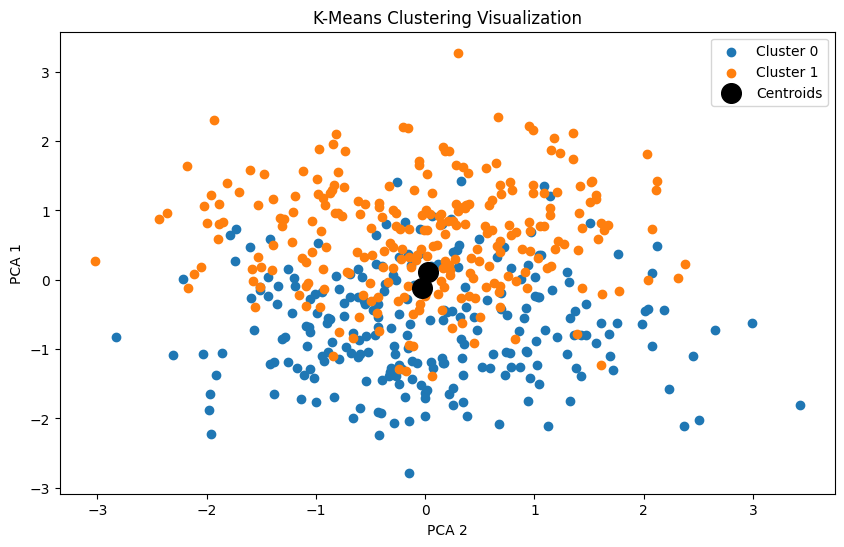

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
df = pd.read_csv("bank_customers_updated.csv")
df = df.head(500)
# Preprocess data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Age", "Income", " TransactionFrequency", " AverageTransactionValue", "YearsWithBank"]),
        ("cat", OneHotEncoder(), ["MostTransactionArea"]),
    ]
)
X_preprocessed = preprocessor.fit_transform(df)

# Train K-Means model for 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_preprocessed)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)

# Plotting
plt.figure(figsize=(10, 6))
for cluster in range(2):
    plt.scatter(X_pca[df["Cluster"] == cluster, 0], X_pca[df["Cluster"] == cluster, 1], label=f"Cluster {cluster}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black", s=200, label="Centroids")
plt.ylabel("PCA 1")
plt.xlabel("PCA 2")
plt.legend()
plt.title("K-Means Clustering Visualization")
plt.show()
